In [1]:
from os import path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mint.config import DATA_DIR

In [2]:
UIT_VSFC_DIR = path.join(DATA_DIR, "UIT-VSFC")

def load_uit_vsfc(subset='train'):
    assert subset in ['train', 'test', 'val'], "Subset must be 'train' or 'test' or 'val'"
    
    data_path = path.join(UIT_VSFC_DIR, subset, 'sents.txt')
    labels_path = path.join(UIT_VSFC_DIR, subset, 'sentiments.txt')

    # Load the data
    with open(data_path, 'r', encoding='utf-8') as f:
        data = f.readlines()

    data = [line.strip() for line in data]

    # Load the labels
    with open(labels_path, 'r', encoding='utf-8') as f:
        labels = f.readlines()
    labels = [int(line.strip()) for line in labels]

    if len(data) != len(labels):
        raise ValueError("Data and labels must have the same length")
    
    return pd.DataFrame({
        'text': data,
        'label': labels
    })


train_df = load_uit_vsfc('train')
test_df = load_uit_vsfc('test')
val_df = load_uit_vsfc('val')

In [3]:
from underthesea import word_tokenize

# Hàm tiền xử lý văn bản
def vi_preprocess_text(text):
    # Tách từ tiếng Việt
    return word_tokenize(text, format="text")

# Tiền xử lý dữ liệu huấn luyện, validation và test
train_df['text'] = train_df['text'].apply(vi_preprocess_text)
val_df['text'] = val_df['text'].apply(vi_preprocess_text)
test_df['text'] = test_df['text'].apply(vi_preprocess_text)

train_df.head()

,text,label
0,slide giáo_trình đầy_đủ .,2
1,"nhiệt_tình giảng_dạy , gần_gũi với sinh_viên .",2
2,đi học đầy_đủ full_điểm chuyên cần .,0
3,chưa áp_dụng công_nghệ_thông_tin và các thiết_...,0
4,"thầy giảng bài hay , có nhiều bài_tập ví_dụ ng...",2


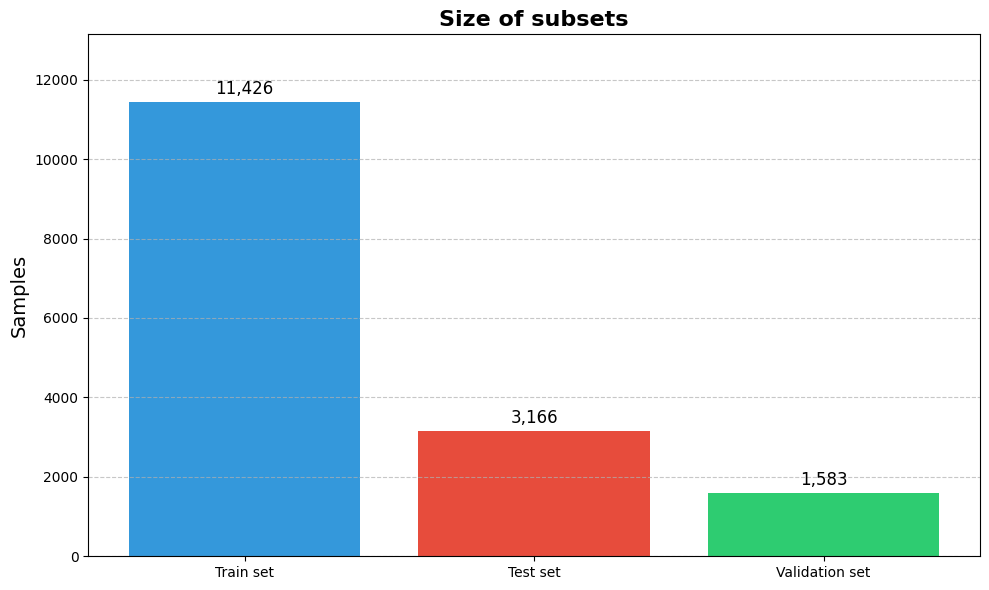

In [4]:
datasets = ['Train set', 'Test set', 'Validation set']
sizes = [len(train_df), len(test_df), len(val_df)]

plt.figure(figsize=(10, 6))
bars = plt.bar(datasets, sizes, color=['#3498db', '#e74c3c', '#2ecc71'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'{height:,}', ha='center', va='bottom', fontsize=12)

plt.title('Size of subsets', fontsize=16, fontweight='bold')
plt.ylabel('Samples', fontsize=14)
plt.ylim(0, max(sizes) * 1.15)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

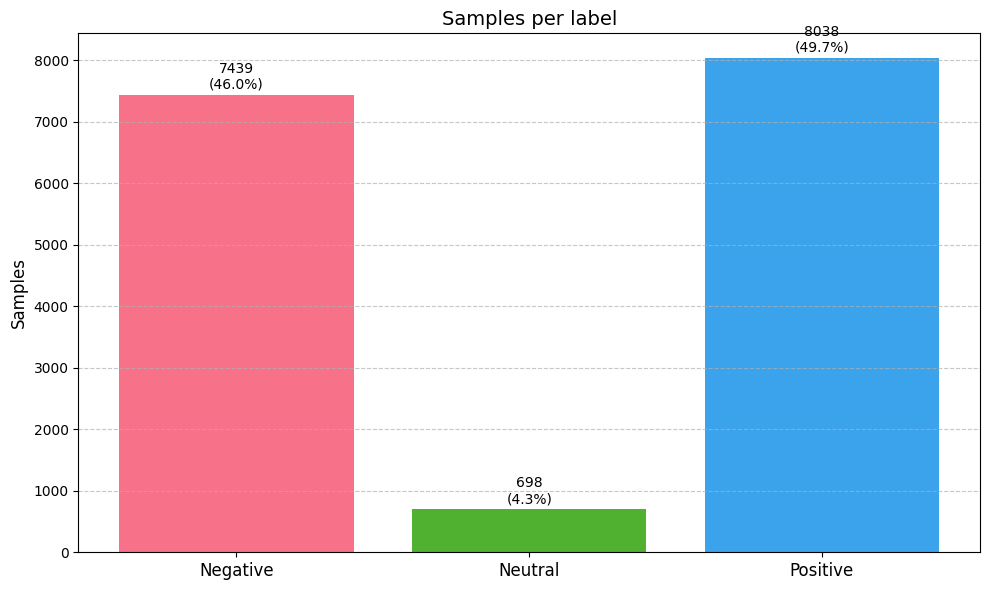

In [5]:
combined_df = pd.concat([train_df, test_df, val_df], ignore_index=True)
# Count the number of samples for each label
label_counts = combined_df['label'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(label_counts))
bars = plt.bar(label_counts.index, label_counts.values, color=colors)


total = len(combined_df)
for i, bar in enumerate(bars):
    count = label_counts.values[i]
    percentage = count / total * 100
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 50,
             f'{count}\n({percentage:.1f}%)', ha='center', va='bottom')


plt.ylabel('Samples', fontsize=12)
plt.title('Samples per label', fontsize=14)
plt.xticks(label_counts.index, ['Negative', 'Neutral', 'Positive'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

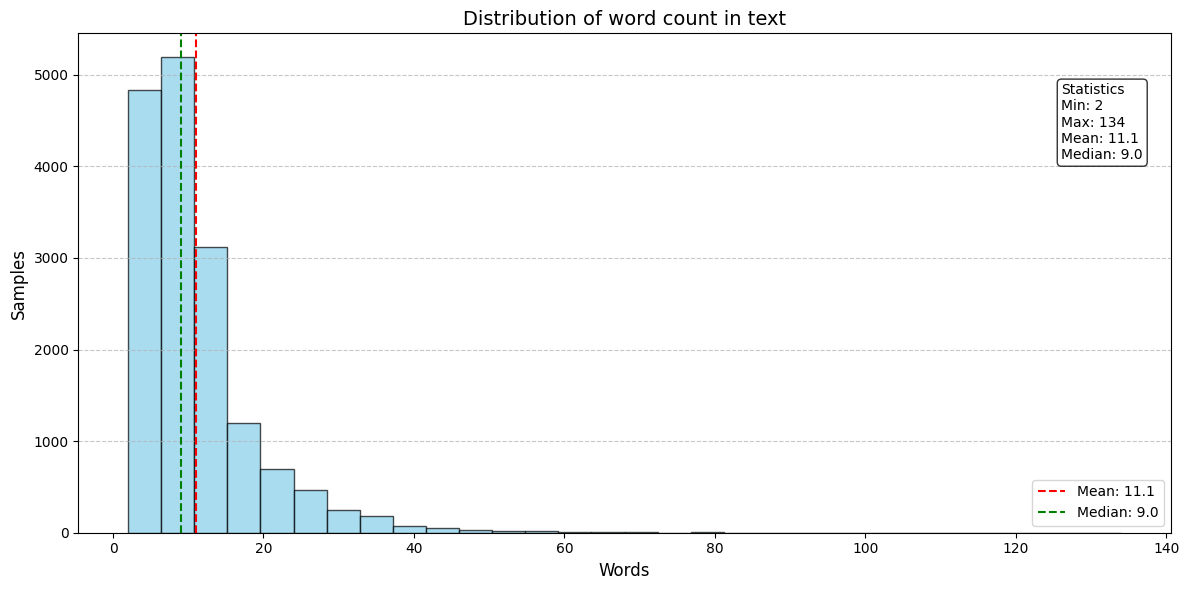

In [6]:

# combined_df = pd.concat([train_df, test_df, val_df], ignore_index=True)
combined_df['word_count'] = combined_df['text'].apply(lambda x: len(x.split()))


plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(combined_df['word_count'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

avg_words = combined_df['word_count'].mean()
median_words = combined_df['word_count'].median()
max_words = combined_df['word_count'].max()
min_words = combined_df['word_count'].min()

plt.axvline(avg_words, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {avg_words:.1f}')
plt.axvline(median_words, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_words}')

plt.title('Distribution of word count in text', fontsize=14)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Samples', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()


stats_text = f"Statistics\nMin: {min_words}\nMax: {max_words}\nMean: {avg_words:.1f}\nMedian: {median_words}"
plt.text(0.9, 0.9, stats_text, transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', horizontalalignment='left',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

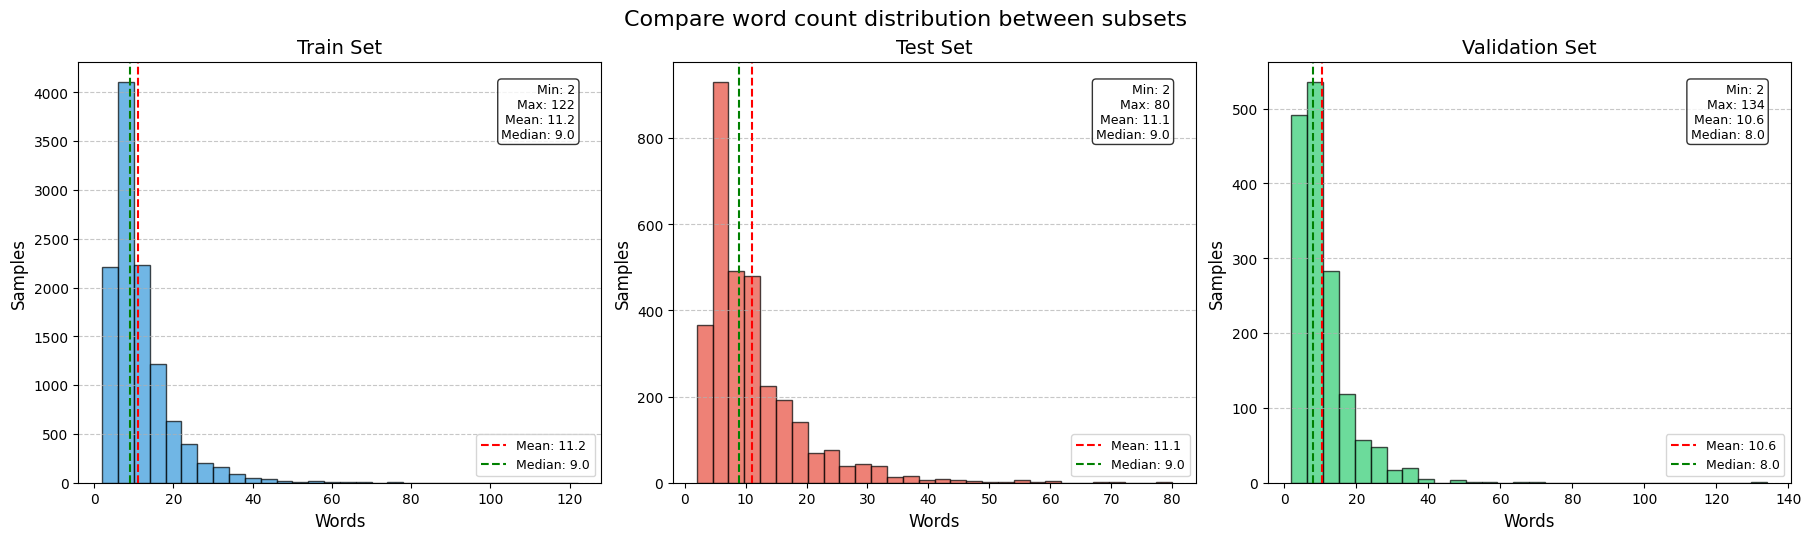

In [7]:
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))
test_df['word_count'] = test_df['text'].apply(lambda x: len(x.split()))
val_df['word_count'] = val_df['text'].apply(lambda x: len(x.split()))

fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

datasets = [train_df, test_df, val_df]
titles = ['Train Set', 'Test Set', 'Validation Set']
colors = ['#3498db', '#e74c3c', '#2ecc71']

# Histogram for each subset
for i, (df, title, color) in enumerate(zip(datasets, titles, colors)):
    # Vẽ histogram
    counts, bins, patches = axes[i].hist(df['word_count'], bins=30, 
                                         color=color, edgecolor='black', alpha=0.7)
    
    avg_words = df['word_count'].mean()
    median_words = df['word_count'].median()
    max_words = df['word_count'].max()
    min_words = df['word_count'].min()
    
    axes[i].axvline(avg_words, color='red', linestyle='--', linewidth=1.5, 
                    label=f'Mean: {avg_words:.1f}')
    axes[i].axvline(median_words, color='green', linestyle='--', linewidth=1.5, 
                    label=f'Median: {median_words}')
    
    stats_text = f"Min: {min_words}\nMax: {max_words}\nMean: {avg_words:.1f}\nMedian: {median_words}"
    axes[i].text(0.95, 0.95, stats_text, transform=axes[i].transAxes, 
                 fontsize=9, verticalalignment='top', horizontalalignment='right',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    axes[i].set_title(title, fontsize=14)
    axes[i].set_xlabel('Words', fontsize=12)
    axes[i].set_ylabel('Samples', fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].legend(fontsize=9)

fig.suptitle('Compare word count distribution between subsets', fontsize=16, y=1.05) 
plt.show()